In [1]:
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
import numpy as np
import pandas as pd
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
root_dir = '/content/drive/MyDrive/weather dataset'

for dirpath, filenames, dirnames in os.walk(root_dir):
  print(f'Directory path: {dirpath}')
  print(f'Filenames: {len(dirnames)}')
  print()

Directory path: /content/drive/MyDrive/weather dataset
Filenames: 0

Directory path: /content/drive/MyDrive/weather dataset/weather dataset
Filenames: 0

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/test
Filenames: 0

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/test/cloud
Filenames: 35

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/test/rain
Filenames: 30

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/test/shine
Filenames: 29

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/test/sunrise
Filenames: 61

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/train
Filenames: 0

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/train/cloud
Filenames: 207

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/train/rain
Filenames: 152

Directory path: /content/drive/MyDrive/weather dataset/weather dataset/train/sh

In [3]:
def retrieve_labels(train_dir, test_dir):
  train_labels = os.listdir(train_dir)
  test_labels = os.listdir(test_dir)
  print(f'Train labels: {train_labels}')
  print(f'Number of train labels: {len(train_labels)}')
  print(f'Test labels: {test_labels}')
  print(f'Number of test labels: {len(test_labels)}')

In [18]:
train_dir = '/content/drive/MyDrive/weather dataset/weather dataset/train'
val_dir = '/content/drive/MyDrive/weather dataset/weather dataset/validation/'
test_dir = '/content/drive/MyDrive/weather dataset/weather dataset/test'

retrieve_labels(train_dir, test_dir)

Train labels: ['cloud', 'rain', 'shine', 'sunrise']
Number of train labels: 4
Test labels: ['cloud', 'rain', 'shine', 'sunrise']
Number of test labels: 4


In [19]:
# Data exploration and images visualization
def random_imagee(target_dir, num_images):
  subdirs = [d for d in os.listdir(target_dir) if os.path.isdir(os.path.join(target_dir, d))]  #list of subdirectories
  print('list of subdirectiories',subdirs)
  random.shuffle(subdirs)
  selected_subdirs = subdirs[:num_images]
  fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

  for i, subdirs in enumerate(selected_subdirs):
    image_path = [f for f in os.listdir(os.path.join(target_dir, subdirs))]
    random_img = random.choice(image_path)
    img = mpimg.imread(os.path.join(target_dir, subdirs, random_img))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(subdirs)

  print(f'shape of image: {img.shape}')
  plt.show()

list of subdirectiories ['cloud', 'rain', 'shine', 'sunrise']
shape of image: (175, 266, 3)


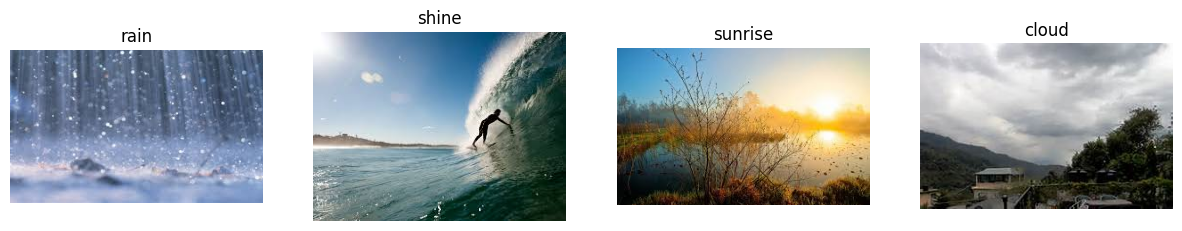

In [20]:
random_imagee( target_dir='/content/drive/MyDrive/weather dataset/weather dataset/train/',num_images=4)

# ImageData Preprocessing

In [21]:
# SCALING / NORMALIZATION
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 64, target_size=(224,224), class_mode='categorical')
val_data = train_datagen.flow_from_directory(val_dir, batch_size = 64, target_size=(224,224), class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, batch_size = 64, target_size=(224,224), class_mode='categorical')

Found 791 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 155 images belonging to 4 classes.


# Building model

In [9]:
model_1 = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(4, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(train_data, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 430s 18s/step - accuracy: 0.4376 - loss: 15.2677
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.7391 - loss: 0.6518
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.8712 - loss: 0.3633
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.9137 - loss: 0.2735
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.9522 - loss: 0.1352
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.9547 - loss: 0.1299
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.9483 - loss: 0.1618
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9693 - loss: 0.0926
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9780 - loss: 0.0661
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.9852 - loss: 0.0465


In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1050)                │      97,978,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293,963,828 (1.10 GB)

 Trainable params: 97,987,942 (373.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 195,975,886 (747.59 MB)

In [13]:
loss, accuracy = model_1.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8660 - loss: 0.4939


# Handing overfitting

1.   EarlyStopping
1.   Changing the model's architecture
2.   L1 and L2 regularization
1.   Dropout regularization
2.   Data augmentation





In [23]:
# 1. EarlyStopping
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]

model_2 = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(4, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(train_data, epochs=10, validation_data=val_data, callbacks=callback)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 556s 25s/step - accuracy: 0.3090 - loss: 4.0471 - val_accuracy: 0.6201 - val_loss: 0.7584
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.6656 - loss: 0.7263 - val_accuracy: 0.8547 - val_loss: 0.4056
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.8512 - loss: 0.4752 - val_accuracy: 0.8659 - val_loss: 0.3001
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.8238 - loss: 0.4382 - val_accuracy: 0.8939 - val_loss: 0.3288
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.8674 - loss: 0.3534 - val_accuracy: 0.8380 - val_loss: 0.3890
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.8902 - loss: 0.3004 - val_accuracy: 0.8827 - val_loss: 0.3244
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.9429 - loss: 0.1835 - val_accuracy: 0.9330 - val_loss: 0.2350
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - accuracy: 0.9415 - loss: 0.1570 - val_accuracy: 0.9162 - val_loss: 0.270

In [24]:
# Model simplification by reducing number of neurons

model_3 = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(4, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs=10, validation_data=val_data, callbacks=callback)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.4853 - loss: 1.3468 - val_accuracy: 0.8436 - val_loss: 0.5290
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.8038 - loss: 0.5841 - val_accuracy: 0.8827 - val_loss: 0.4332
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.8428 - loss: 0.4394 - val_accuracy: 0.8994 - val_loss: 0.2704


In [25]:
# L1 & L2 regularization

model_4 = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1050, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), #change L2 to L1 for L1 regularization
    Dense(4, activation='softmax')
])

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_4 = model_4.fit(train_data, epochs=10, validation_data=val_data, callbacks=callback)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.3518 - loss: 18.2716 - val_accuracy: 0.6145 - val_loss: 6.0170
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.6607 - loss: 5.6699 - val_accuracy: 0.7821 - val_loss: 3.7951
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.7852 - loss: 3.4334 - val_accuracy: 0.9106 - val_loss: 2.1949


In [26]:
# Dropout Regularization

model_5 = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1050, activation='relu'),
    Dropout(0.6),
    Dense(4, activation='softmax')
])

model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_5 = model_5.fit(train_data, epochs=10, validation_data=val_data, callbacks=callback)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.3498 - loss: 3.7266 - val_accuracy: 0.7542 - val_loss: 0.7135
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.7606 - loss: 0.7669 - val_accuracy: 0.7654 - val_loss: 0.5905
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.8210 - loss: 0.5266 - val_accuracy: 0.8603 - val_loss: 0.4013


In [28]:
# Adjusting the learning rate

model_6 = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(4, activation='softmax')
])

model_6.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

history_6 = model_6.fit(train_data, epochs=10, callbacks=callback, validation_data=val_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.4140 - loss: 1.3448 - val_accuracy: 0.4637 - val_loss: 1.0680
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.5737 - loss: 0.9655 - val_accuracy: 0.7877 - val_loss: 0.6825
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.7843 - loss: 0.6555 - val_accuracy: 0.8380 - val_loss: 0.5052


In [30]:
# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 25,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(224,224), class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), class_mode='categorical')

Found 791 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 155 images belonging to 4 classes.


In [33]:
model_7 = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(4, activation='softmax')
])

model_7.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

history_7 = model_7.fit(train_data, epochs=10, callbacks=callback, validation_data=val_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.4370 - loss: 1.2771 - val_accuracy: 0.7263 - val_loss: 0.8027
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.6791 - loss: 0.7877 - val_accuracy: 0.7430 - val_loss: 0.6014
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.7677 - loss: 0.6305 - val_accuracy: 0.8603 - val_loss: 0.4442


In [41]:
models=[model_1,model_2,model_3,model_4,model_5,model_6,model_7]
losses=[]
accuracys=[]
for model in models:
  loss, accuracy = model.evaluate(test_data)
  losses.append(loss)
  accuracys.append(accuracy)
  #print(f'Loss: {loss}, Accuracy: {accuracy}')

analysis = pd.DataFrame(list(zip(models,losses, accuracys)), columns =['Model','Loss', 'Accuracy'])
analysis

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9078 - loss: 0.2621
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9061 - loss: 0.2616
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 535ms/step - accuracy: 0.8750 - loss: 0.4434
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step - accuracy: 0.7084 - loss: 5.8951
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 983ms/step - accuracy: 0.8208 - loss: 0.7013
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 582ms/step - accuracy: 0.5894 - loss: 0.9726
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 756ms/step - accuracy: 0.7481 - loss: 0.6979


,Model,Loss,Accuracy
0,"<Sequential name=sequential, built=True>",0.181646,0.929032
1,"<Sequential name=sequential_1, built=True>",0.294245,0.896774
2,"<Sequential name=sequential_2, built=True>",0.461783,0.870968
3,"<Sequential name=sequential_3, built=True>",5.911750,0.703226
4,"<Sequential name=sequential_4, built=True>",0.649603,0.825806
5,"<Sequential name=sequential_6, built=True>",0.977612,0.561290
6,"<Sequential name=sequential_8, built=True>",0.704808,0.774194
